In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from collections import Counter

x, y, = load_iris(return_X_y=True)

print(x.shape, y.shape)

(150, 4) (150,)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.67, random_state=42)

print(f' y_train {y_train}\n')
print(f' y_test  {y_test}')

 y_train [0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2
 1 2 1 1 2 2 0 1 2 0 1 2]

 y_test  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0]


In [23]:
print(f'y_train: {Counter(y_train)}')
print(f'y_test: {Counter(y_test)}')

y_train: Counter({2: 19, 1: 18, 0: 12})
y_test: Counter({0: 38, 1: 32, 2: 31})


-------------------------------------------

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.67, random_state=42, stratify=y)

print(f' y_train {Y_train}\n')
print(f' y_test  {Y_test}')

 y_train [2 0 2 1 0 0 0 2 0 0 1 0 1 1 2 2 0 0 2 0 2 0 0 2 0 1 2 1 0 1 0 2 1 2 1 0 2
 0 2 0 1 1 0 2 1 1 0 2 1 2 0 1 0 2 1 1 1 1 1 1 2 1 2 2 0 2 1 1 2 0 2 2 2 0
 2 0 0 2 2 2 0 1 2 2 0 1 1 1 1 1 0 2 1 2 0 0 1 0 1 0]

 y_test  [2 1 0 1 2 1 1 0 1 1 0 0 0 0 0 2 2 1 2 1 2 1 0 2 0 2 2 0 0 2 2 2 0 1 0 0 2
 1 1 1 1 1 0 0 2 1 2 2 1 2]


In [25]:
print(f'y_train: {Counter(Y_train)}')
print(f'y_test: {Counter(Y_test)}')

y_train: Counter({0: 34, 2: 33, 1: 33})
y_test: Counter({2: 17, 1: 17, 0: 16})


In [28]:
n = np.random.normal(-100, 100, 50)

n

array([-215.77390121,  -50.83194027, -127.17454556, -282.38850506,
        -44.10359946, -148.34704838, -234.26178763,   12.65855816,
       -164.4394425 ,  -36.75935433, -191.36605199, -193.70101116,
         30.36949408,    8.89602916, -234.0340375 ,  -22.14921639,
       -114.84089922, -168.38498873,  -25.35092318,  -62.62281351,
        -37.2992015 , -222.58043274, -219.18530763, -211.40818373,
        -59.21932996,   65.31866771, -105.77991387, -282.79595726,
        -90.01632065, -248.79855207, -155.35332204,  -99.98233837,
        -44.34254905,    7.25906207, -139.55468841, -108.62031876,
       -109.87625627, -120.99527683,  -41.17580554, -221.20012345,
       -205.10801306,  -66.41980497,  -36.12740754,   12.59533533,
       -134.38793195,  -65.85961159, -214.99793613, -235.38990843,
          7.86833142, -153.34886347])

In [29]:
print(min(n))
print(max(n))


-282.79595726420314
65.3186677067884


--------------------

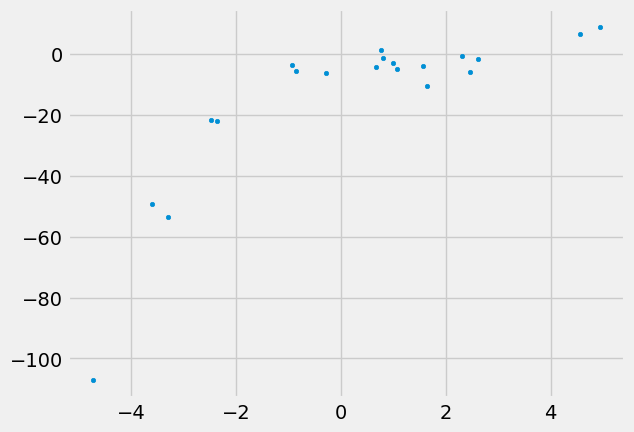

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import operator

np.random.seed(0)

x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [89]:
x

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
        1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722])

In [2]:
model_l = LinearRegression()
model_l.fit(x.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [3]:
df = pd.DataFrame({'x': x, 'y': y})

df.corr()

,x,y
x,1.000000,0.799171
y,0.799171,1.000000


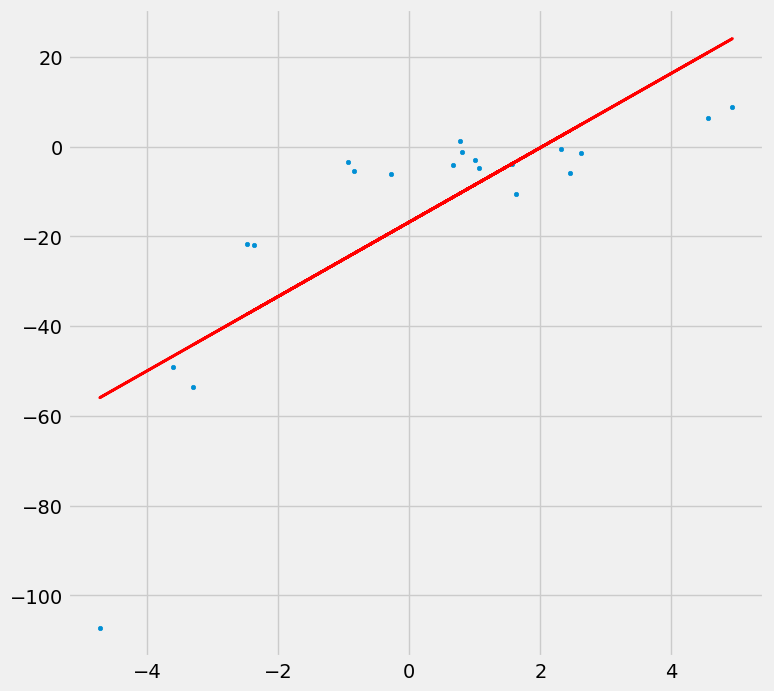

In [4]:
y_pred = model_l.predict(x.reshape(-1, 1))
df['y_pred'] = y_pred


plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.scatter(x,y, s=10)
plt.plot(x, y_pred, color='r', linewidth=2)
plt.show()

In [5]:
print('RMSE: ', sum(abs(df['y'] - df['y_pred'])**2 / len(df['x']))**0.5)
print('R2  : ', r2_score(df['y'], df['y_pred']))

RMSE:  15.908242501429998
R2  :  0.6386750054827146


--------------------

In [94]:
y_pred

array([[-44.09629271],
       [-10.16645153],
       [-24.5598996 ],
       [-55.95874018],
       [-46.67121946],
       [ 24.10022521],
       [-23.84717967],
       [  3.55366232],
       [  2.35611659],
       [-10.42620129],
       [ -3.79507092],
       [-36.38987415],
       [-19.14413485],
       [ -3.23860475],
       [-11.25373341],
       [ -8.51254609],
       [-37.38012369],
       [  4.89207993],
       [ -7.99991171],
       [ 21.03580306]])

In [93]:
sorted_z = sorted(y_pred, key=operator.itemgetter(0))
sorted_z

[array([-55.95874018]),
 array([-46.67121946]),
 array([-44.09629271]),
 array([-37.38012369]),
 array([-36.38987415]),
 array([-24.5598996]),
 array([-23.84717967]),
 array([-19.14413485]),
 array([-11.25373341]),
 array([-10.42620129]),
 array([-10.16645153]),
 array([-8.51254609]),
 array([-7.99991171]),
 array([-3.79507092]),
 array([-3.23860475]),
 array([2.35611659]),
 array([3.55366232]),
 array([4.89207993]),
 array([21.03580306]),
 array([24.10022521])]

In [96]:
sorted(y_pred)

[array([-55.95874018]),
 array([-46.67121946]),
 array([-44.09629271]),
 array([-37.38012369]),
 array([-36.38987415]),
 array([-24.5598996]),
 array([-23.84717967]),
 array([-19.14413485]),
 array([-11.25373341]),
 array([-10.42620129]),
 array([-10.16645153]),
 array([-8.51254609]),
 array([-7.99991171]),
 array([-3.79507092]),
 array([-3.23860475]),
 array([2.35611659]),
 array([3.55366232]),
 array([4.89207993]),
 array([21.03580306]),
 array([24.10022521])]

In [99]:
model_poly = PolynomialFeatures(degree=2)
x_poly = model_poly.fit_transform(x.reshape(-1, 1))


model_l = LinearRegression()
model_l.fit(x_poly, y)

LinearRegression()

In [100]:
y_poly_l = model_l.predict(x_poly)
y_poly_l

array([-51.70395899,  -0.3768314 , -15.49084857, -82.51360898,
       -57.82529579,  -3.8842325 , -14.51152638,   4.89510132,
         4.7901049 ,  -0.56263917,   3.18023781, -35.26006027,
        -8.65246595,   3.39960586,  -1.17590986,   0.73130614,
       -37.21553918,   4.93206451,   1.04847428,  -1.30607467])

In [101]:
df['y_poly_pred'] = y_poly_l

In [102]:
rmse1 = mean_squared_error(df['y'], df['y_pred'])**0.5
rmse2 = mean_squared_error(df['y'], df['y_poly_pred'])**0.5

r2_1 = r2_score(df['y'], df['y_pred'])
r2_2 = r2_score(df['y'], df['y_poly_pred'])

In [103]:
print(f'RMSE: Liner  {rmse1:.2f} RMSE: Poly  {rmse2:.2f}', sep='\n')
print(f'R2: Liner  {r2_1:.2f} R2: Poly  {r2_2:.2f}', sep='\n')

RMSE: Liner  15.91 RMSE: Poly  10.12
R2: Liner  0.64 R2: Poly  0.85


In [ ]:
sort_axis = operator.itemgetter(0)

sorted_zip = sorted(zip(x, y_poly_l), key=sort_axis)

x, y_poly_l = zip(*sorted_zip)

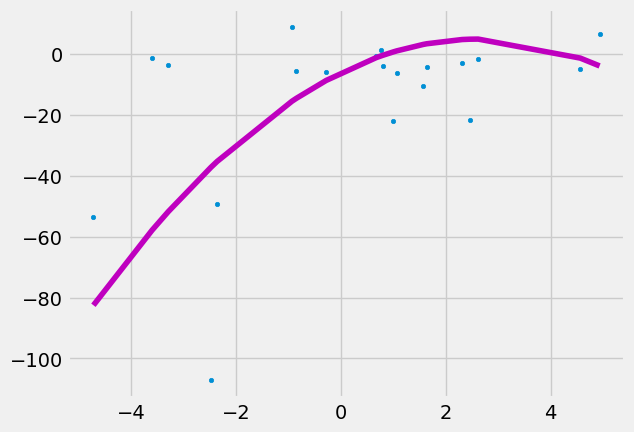

In [113]:
plt.scatter(x, y, s=10)

plt.plot(x, y_poly_l, color='m')
plt.show()

--------------

rmse: 3.45
r2:  0.98


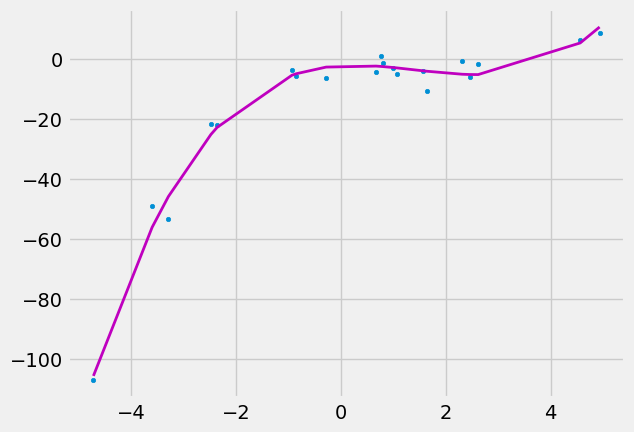

In [130]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(f'rmse: {rmse:.2f}')
print(f'r2:  {r2:.2f}')



sorted_zip = sorted(zip(x, y_poly_pred), key=itemgetter(0))

X, Y_poly_pred = zip(*sorted_zip)

plt.scatter(x, y, s=10)
plt.plot(X, Y_poly_pred, color='m', linewidth=2)
plt.show()

In [2]:
degrees = [2, 3, 4, 5, 6]

for deg in degrees:
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)

    y_poly_pred = model.predict(x_poly)
    
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)



    sorted_zip = sorted(zip(x, y_poly_pred), key=itemgetter(0))

    X, Y_poly_pred = zip(*sorted_zip)

    plt.scatter(x, y, s=10)
    plt.plot(X, Y_poly_pred, color='m', linewidth=2)
    plt.xlabel(f'degree: {deg}')
 
    plt.show()
    print(f'rmse: {rmse:.2f}')
    print(f'r2:  {r2:.2f}')
    

NameError: name 'PolynomialFeatures' is not defined

----------------------

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.model_selection import train_test_split


df = pd.read_csv('BostonHousing.csv')

x, y = df.iloc[::,-1], df.iloc[::,-2]

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot: xlabel='lstat', ylabel='medv'>

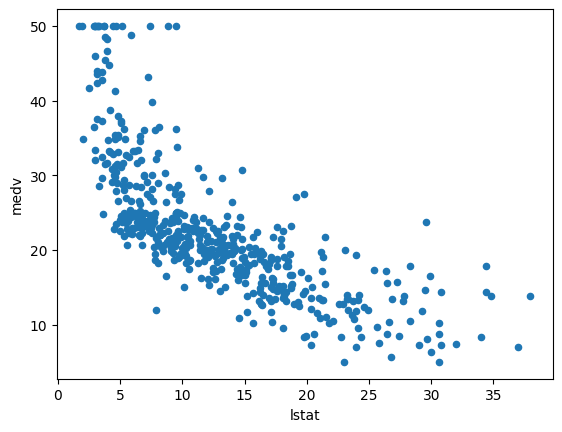

In [2]:
df.plot(x='lstat', y='medv', kind='scatter')

<AxesSubplot: xlabel='rm', ylabel='medv'>

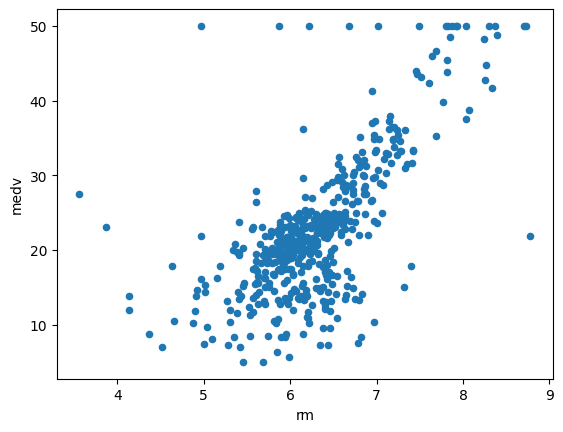

In [3]:
df.plot(x='rm', y='medv', kind='scatter')

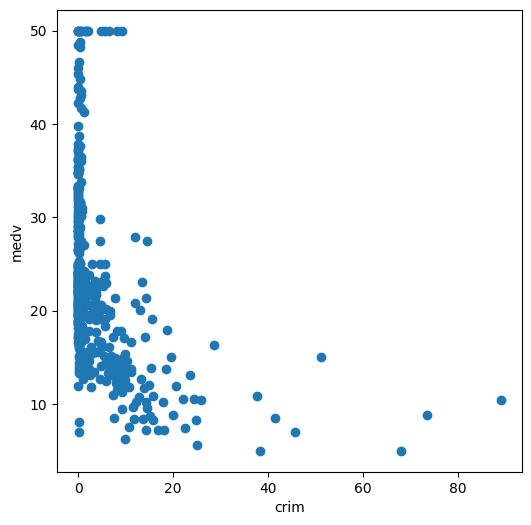

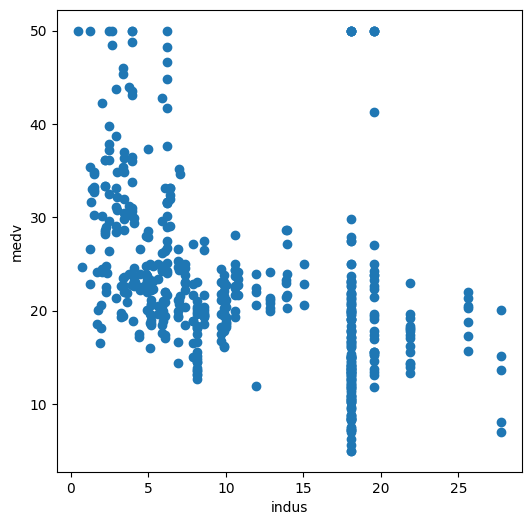

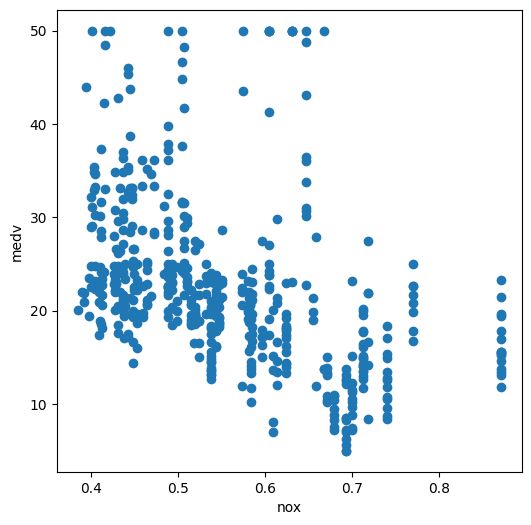

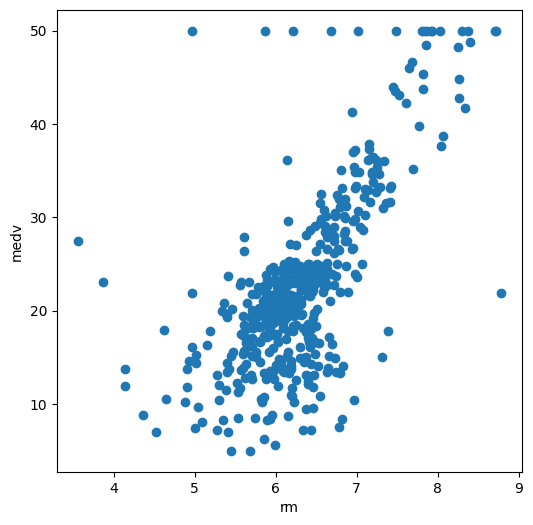

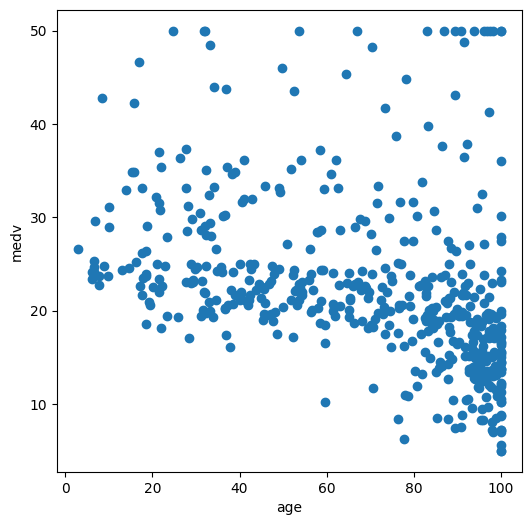

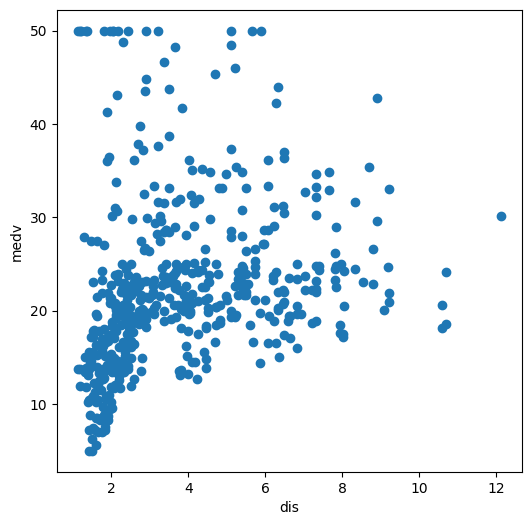

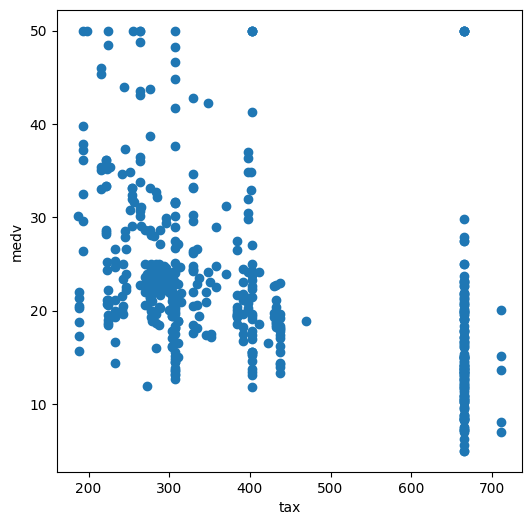

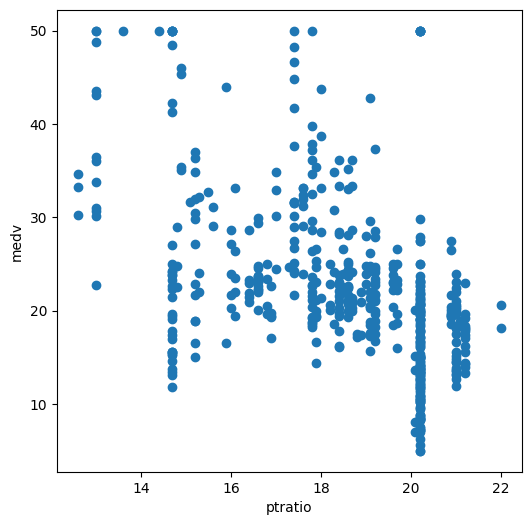

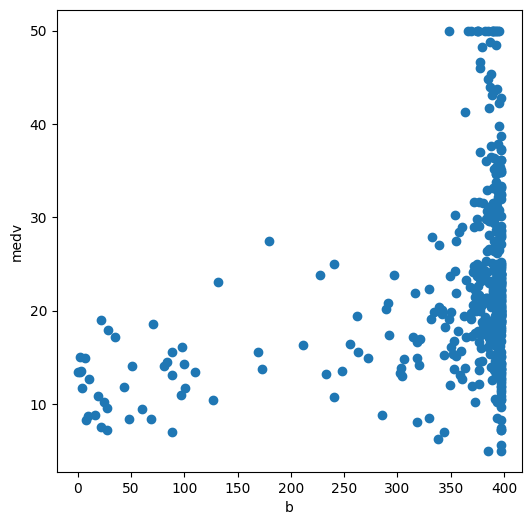

In [5]:
col = ['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b']

for i in col:
    plt.figure(figsize=(6, 6))
    plt.scatter(x=i, y='medv', data=df)
    plt.xlabel(i)
    plt.ylabel('medv')
    plt.show()

In [6]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


---

In [14]:
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [15]:
model_l = LinearRegression()
model_l.fit(x, y)

LinearRegression()

In [16]:
y_pred = model_l.predict(x)

In [17]:
print('MAE : ', mean_absolute_error(y, y_pred))
print('RMSE: ', mean_squared_error(y, y_pred)**0.5)
print('R2  : ', r2_score(y, y_pred))


MAE :  3.68314434599536
RMSE:  4.816659518592132
R2  :  0.5441462975864797


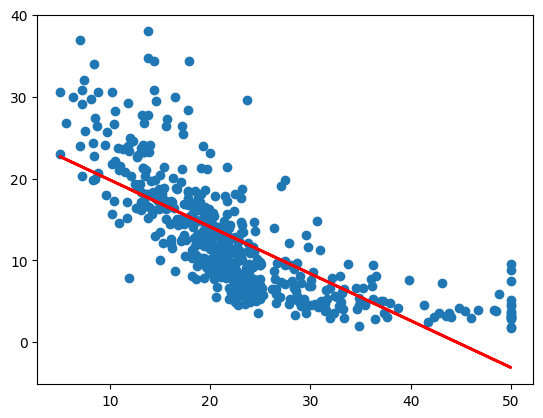

In [18]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2)

-----

In [19]:
model_poly = PolynomialFeatures(degree=4)
x_poly = model_poly.fit_transform(x)


model_l2 = LinearRegression()
model_l2.fit(x_poly, y)

LinearRegression()

In [20]:
y_pred_poly = model_l2.predict(x_poly)

In [21]:
print('MAE : ', mean_absolute_error(y, y_pred_poly))
print('RMSE: ', mean_squared_error(y, y_pred_poly)**0.5)
print('R2  : ', r2_score(y, y_pred_poly))


MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894


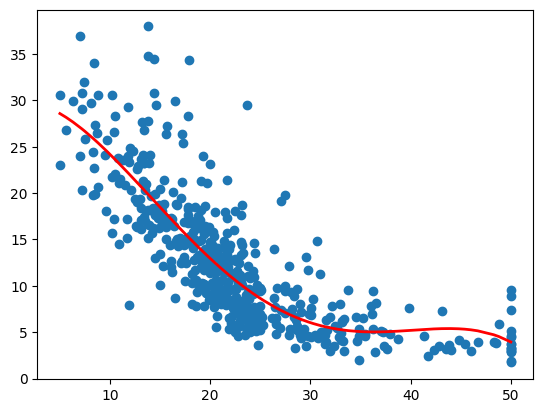

In [22]:


sorted_zip = sorted(zip(x, y_pred_poly), key=itemgetter(0))

X, Y_poly_pred = zip(*sorted_zip)

plt.scatter(x, y)
plt.plot(X, Y_poly_pred, color='red', linewidth=2)

degree: 2
MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894


degree: 3
MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894


degree: 4
MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894


degree: 5
MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894


degree: 6
MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894


degree: 7
MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894


degree: 8
MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894


degree: 9
MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894


degree: 10
MAE :  2.8809313365908213
RMSE:  4.006592304660802
R2  :  0.684583872193894




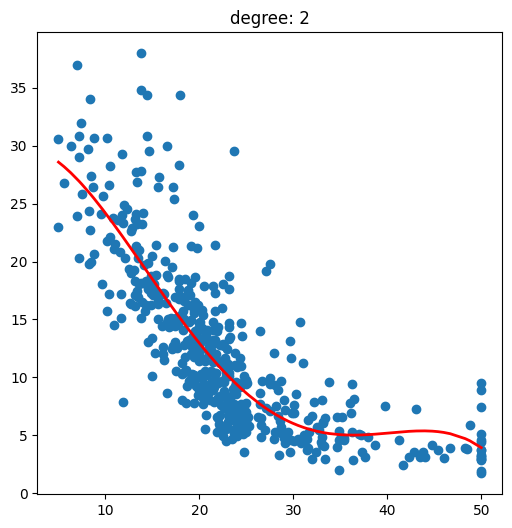

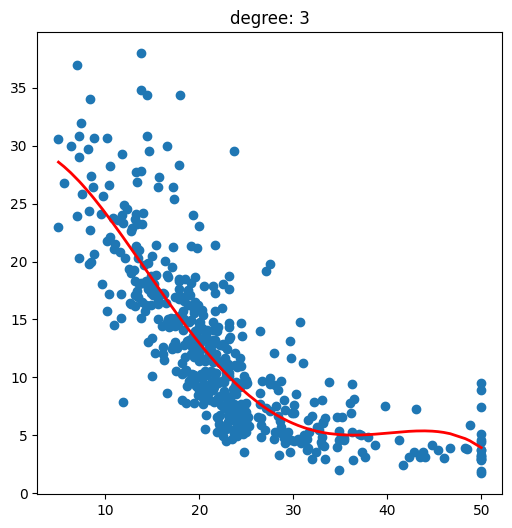

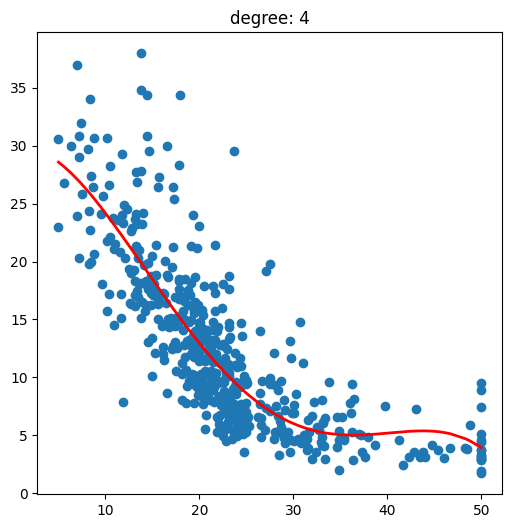

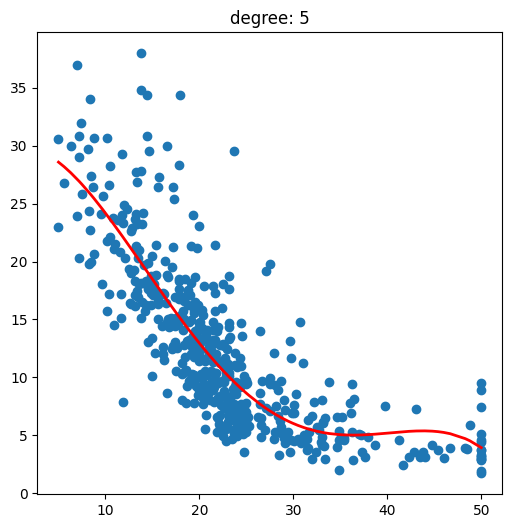

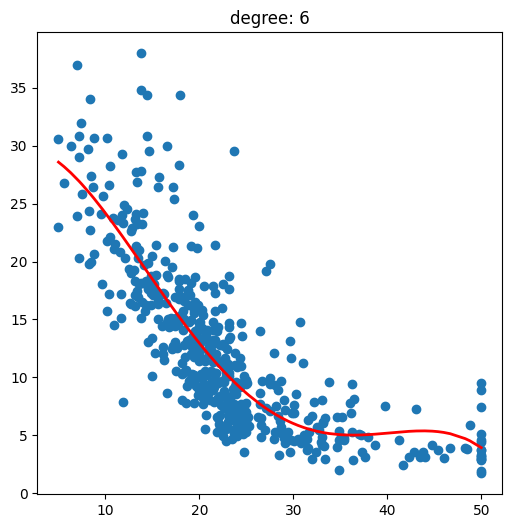

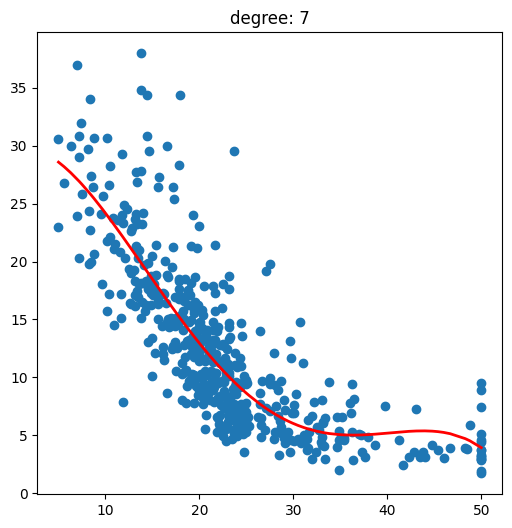

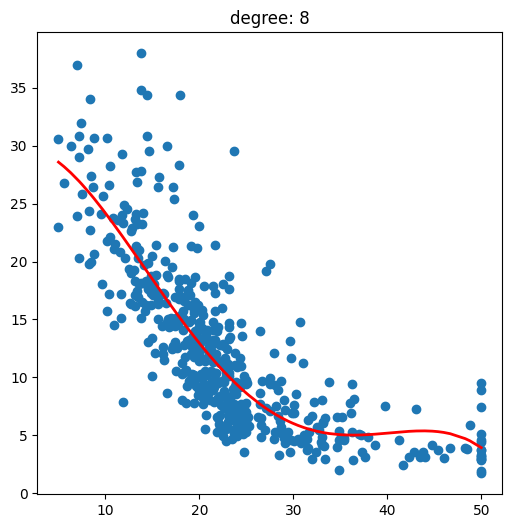

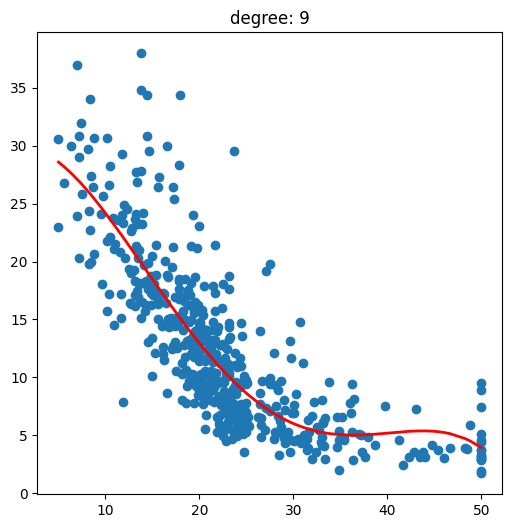

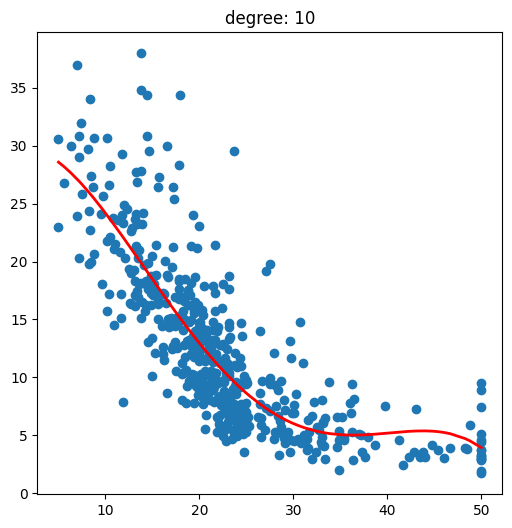

In [24]:
degrees = [2, 3, 4, 5, 6, 7 , 8, 9, 10]

for d in degrees:
    model_poly2 = PolynomialFeatures(degree=d)
    x_poly2 = model_poly.fit_transform(x)


    model_l3 = LinearRegression()
    model_l3.fit(x_poly2, y)
    
    y_pred_poly3 = model_l3.predict(x_poly2)
    
    sorted_zip = sorted(zip(x, y_pred_poly3), key=itemgetter(0))

    X, Y_poly_pred = zip(*sorted_zip)
    
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y)
    plt.title(f'degree: {d}')
    plt.plot(X, Y_poly_pred, color='red', linewidth=2)
    
    
    
    print(f'degree: {d}')
    print('MAE : ', mean_absolute_error(y, y_pred_poly3))
    print('RMSE: ', mean_squared_error(y, y_pred_poly3)**0.5)
    print('R2  : ', r2_score(y, y_pred_poly3))
    print('\n')

    

-----------

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.45, shuffle=True)

In [119]:

model_poly4 = PolynomialFeatures(degree=4)
x_poly4 = model_poly4.fit_transform(x_train)

molde_l4 = LinearRegression()
model_l4.fit(x_poly4, y_train)

LinearRegression()

In [120]:
y_pred_poly4 = model_l4.predict(x_poly4)
y_pred_poly_test = model_l4.predict(model_poly4.fit_transform(x_test))

In [121]:
print('MAE : ', mean_absolute_error(y_train, y_pred_poly4))
print('RMSE: ', mean_squared_error(y_train, y_pred_poly4)**0.5)
print('R2  : ', r2_score(y_train, y_pred_poly4))

MAE :  2.7880184341549734
RMSE:  3.908899466078123
R2  :  0.6911874816999262


In [122]:
print('MAE : ', mean_absolute_error(y_test, y_pred_poly_test))
print('RMSE: ', mean_squared_error(y_test, y_pred_poly_test)**0.5)
print('R2  : ', r2_score(y_test, y_pred_poly_test))

MAE :  2.980172773645552
RMSE:  4.13865115037517
R2  :  0.6740075811813747


---------------------

#### Ругулизация

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'

df = pd.read_csv(url, header=None, na_values=['?'])

df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [6]:
df[127].describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: 127, dtype: float64

<AxesSubplot: >

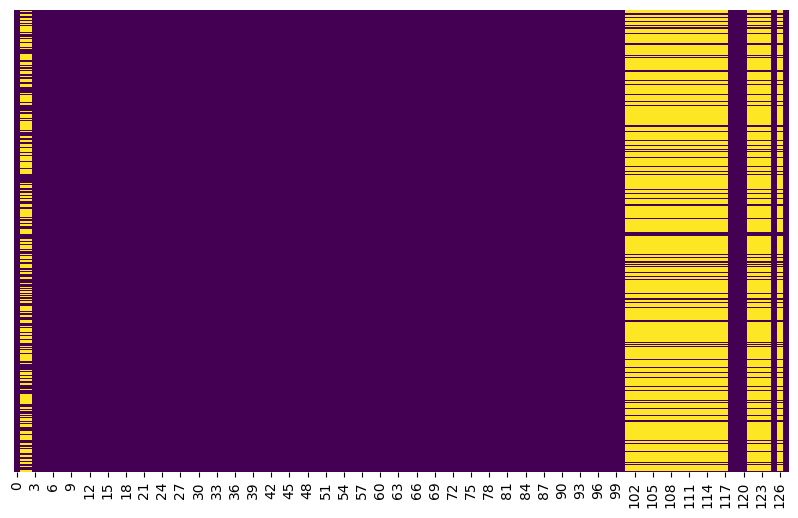

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
df.drop([0, 1, 2 ,3 ,4], axis=1, inplace=True)

In [20]:
x = df.drop([127], axis=1)
y = df[127]

In [23]:
df.dropna(inplace=True)

<AxesSubplot: >

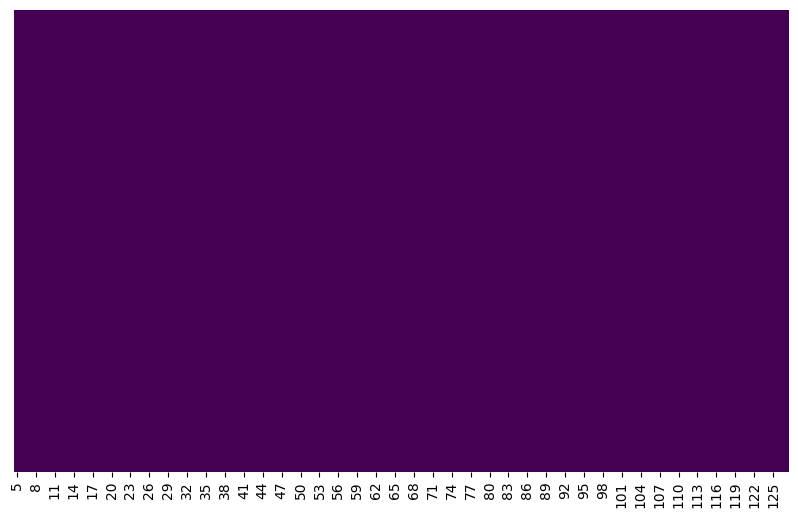

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [27]:
x = df.drop([127], axis=1)
y = df[127]

----

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [29]:
model_l = LinearRegression()
model_l.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = model_l.predict(x_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}", sep='\n')

MAE: 0.17
MSE: 0.05
RMSE: 0.22
r2_score: 0.20


### Ridge model

In [32]:
model_r = Ridge(alpha=0)
model_r.fit(x_train, y_train)

Ridge(alpha=0)

In [33]:
y_pred_r = model_r.predict(x_test)

In [34]:
mae = mean_absolute_error(y_test, y_pred_r)
mse = mean_squared_error(y_test, y_pred_r)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred_r)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}", sep='\n')

MAE: 0.17
MSE: 0.05
RMSE: 0.22
r2_score: 0.20


--------------

In [35]:
model_r2 = Ridge(alpha=0.1)
model_r2.fit(x_train, y_train)

Ridge(alpha=0.1)

In [36]:
y_pred_r2 = model_r2.predict(x_test)

In [37]:
mae = mean_absolute_error(y_test, y_pred_r2)
mse = mean_squared_error(y_test, y_pred_r2)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred_r2)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}", sep='\n')

MAE: 0.13
MSE: 0.03
RMSE: 0.17
r2_score: 0.53


--------

In [38]:
alpha_range = 10.**np.arange(-2, 3)
alpha_range


from sklearn.linear_model import RidgeCV

ridgeregcv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error')
ridgeregcv.fit(x_train, y_train)

print(ridgeregcv.alpha_)
print(alpha_range)

10.0
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [39]:
y_pred_Rcv = ridgeregcv.predict(x_test)

In [40]:
mae = mean_absolute_error(y_test, y_pred_Rcv)
mse = mean_squared_error(y_test, y_pred_Rcv)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred_Rcv)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}", sep='\n')

MAE: 0.13
MSE: 0.03
RMSE: 0.17
r2_score: 0.54


--------

In [46]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [47]:
y_pred_lasso = model_lasso.predict(x_test)

In [48]:
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred_lasso)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}", sep='\n')

MAE: 0.14
MSE: 0.03
RMSE: 0.17
r2_score: 0.55


----------

In [50]:
from sklearn.linear_model import LassoCV

model_lasso_cv = LassoCV(n_alphas=100, random_state=1)
model_lasso_cv.fit(x_train, y_train)

LassoCV(random_state=1)

In [56]:
print('alpha: ', model_lasso_cv.alpha_)
print('coef_: ', model_lasso_cv.coef_)

alpha:  0.0029564957162874243
coef_:  [ 0.         -0.          0.05482897 -0.21590313 -0.          0.
  0.         -0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.0398597   0.          0.03838033
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.13216579  0.
  0.         -0.          0.02523867 -0.         -0.          0.
  0.         -0.          0.11986949  0.          0.          0.
  0.         -0.02528178 -0.2950619  -0.         -0.         -0.
 -0.         -0.          0.08750744  0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
 -0.         -0.          0.00949807  0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.01256026 -0.
 -0.         -0.          0.         -0.    

In [57]:
y_pred_lasso_cv = model_lasso_cv.predict(x_test)

In [58]:
mae = mean_absolute_error(y_test, y_pred_lasso_cv)
mse = mean_squared_error(y_test, y_pred_lasso_cv)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred_lasso_cv)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}", sep='\n')

MAE: 0.13
MSE: 0.03
RMSE: 0.17
r2_score: 0.54


--------

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV , RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from numpy import genfromtxt


dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')

x = dataset[:,:-1]
y = dataset[:,-1]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [50]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [71]:
y_pred = lr.predict(x_test)

print(f"Linear Regression-Training set score: {lr.score(x_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(x_test, y_test):.2f}")
print(f" R2  : {r2_score(y_test, y_pred):.2f}")
print(f" MAE : {mean_absolute_error(y_test, y_pred):.2f}")
print(f" MSE : {mean_squared_error(y_test, y_pred):.2f}")
print(f" MAE : {mean_squared_error(y_test, y_pred)**0.5:.2f}")

print(len(lr.coef_))
print(sum(lr.coef_ != 0))

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.61
 R2  : 0.61
 MAE : 3.23
 MSE : 32.07
 MAE : 5.66
104
104


----------

In [53]:
model_ridge = Ridge(alpha=0.7)
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.7)

In [54]:
y_pred_ridge = model_ridge.predict(x_test)

In [70]:
print(f"Linear Regression-Training set score: {model_ridge.score(x_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {model_ridge.score(x_test, y_test):.2f}")
print(f" R2  : {r2_score(y_test, y_pred_ridge):.2f}")
print(f" MAE : {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f" MSE : {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f" MAE : {mean_squared_error(y_test, y_pred_ridge)**0.5:.2f}")

print(len(model_ridge.coef_))
print(sum(model_ridge.coef_ != 0))

Linear Regression-Training set score: 0.90
Linear Regression-Test set score: 0.76
 R2  : 0.76
 MAE : 2.92
 MSE : 19.49
 MAE : 4.41
104
104


-----

In [72]:
import warnings
warnings.filterwarnings('ignore')

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [73]:
y_pred_lasso = model_lasso.predict(x_test)

In [74]:
print(f"Linear Regression-Training set score: {model_lasso.score(x_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {model_lasso.score(x_test, y_test):.2f}")
print(f" R2  : {r2_score(y_test, y_pred_lasso):.2f}")
print(f" MAE : {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f" MSE : {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f" MAE : {mean_squared_error(y_test, y_pred_lasso)**0.5:.2f}")

Linear Regression-Training set score: 0.90
Linear Regression-Test set score: 0.77
 R2  : 0.77
 MAE : 2.76
 MSE : 18.97
 MAE : 4.36


In [75]:
print(len(model_lasso.coef_))
print(sum(model_lasso.coef_ != 0))

104
32


------------

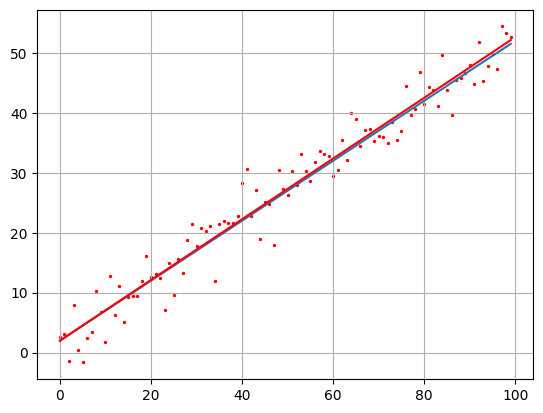

In [158]:
import numpy as np
import matplotlib.pyplot as plt

N = 100     # число экспериментов
sigma = 3   # стандартное отклонение наблюдаемых значений
k = 0.5     # теоретическое значение параметра k
b = 2       # теоретическое значение параметра b

x = np.array(range(N))
f = np.array([k*z+b for z in range(N)])
y = f + np.random.normal(0, sigma, N)

# вычисляем коэффициенты
mx = x.sum()/N
my = y.sum()/N
a2 = np.dot(x.T, x)/N
a11 = np.dot(x.T, y)/N

kk = (a11 - mx*my)/(a2 - mx**2)
bb = my - kk*mx
ff = np.array([kk*z+bb for z in range(N)])

plt.scatter(x, y, s=2, c='red')
plt.plot(f)
plt.plot(ff, c='red')
plt.grid(True)
plt.show()

In [159]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [160]:
y

array([ 2.64934796,  3.07869052, -1.4119948 ,  8.0030493 ,  0.45835847,
       -1.63851958,  2.44971095,  3.37407931, 10.24196462,  6.84365715,
        1.82504965, 12.77317476,  6.29370726, 11.07354875,  5.10578369,
        9.35199356,  9.39617392,  9.52230829, 12.01453532, 16.11642548,
       12.66323903, 13.09872065, 12.4557554 ,  7.11488588, 14.97350989,
        9.65347825, 15.544365  , 13.30971061, 18.74412402, 21.47969119,
       17.75630328, 20.82483342, 20.22608226, 21.16829839, 12.01344759,
       21.49015906, 21.93853895, 21.56290041, 21.61352899, 22.84298702,
       28.20136019, 30.55090419, 22.71921598, 27.11144535, 19.00078554,
       25.1023835 , 24.75157315, 17.97248419, 30.46306115, 27.24253765,
       26.27871552, 30.34420296, 27.99206484, 33.11384685, 30.20359828,
       28.56149597, 31.86058418, 33.66094764, 33.1066622 , 32.82130044,
       29.46697534, 30.42465105, 35.45721277, 32.135881  , 39.88495716,
       39.02823319, 34.4526688 , 37.05889052, 37.34125631, 35.30

In [148]:
mae = mean_absolute_error(y, ff)
mse = mean_squared_error(y, ff)
rmse = mse**0.5
r2 = r2_score(y, ff)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}", sep='\n')

MAE: 2.20
MSE: 7.17
RMSE: 2.68
r2_score: 0.97


--------------

In [149]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [150]:
model_l = LinearRegression()
model_l.fit(x.reshape(-1, 1), y)

LinearRegression()

In [153]:
y_pred = model_l.predict(x.reshape(-1, 1))

In [154]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}", sep='\n')

MAE: 2.20
MSE: 7.17
RMSE: 2.68
r2_score: 0.97


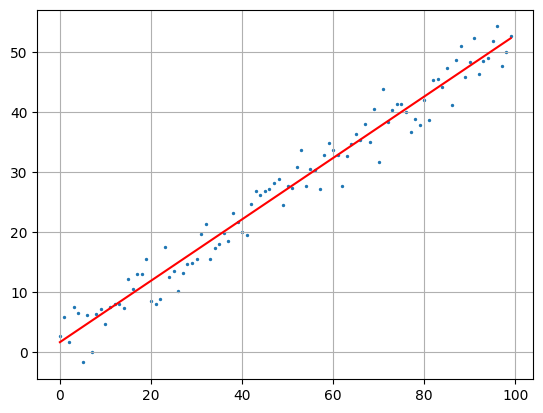

In [155]:
plt.scatter(x, y, s=2)
plt.plot(y_pred, c='r')
plt.grid(True)

-----------

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, random_state=42, test_size=0.4)

In [91]:
model_R = Ridge(alpha=0.1)
model_R.fit(x.reshape(-1, 1), y)

Ridge(alpha=0.1)

In [92]:
y_pred_r = model_R.predict(x.reshape(-1, 1))

In [96]:
mae = mean_absolute_error(y, y_pred_r)
mse = mean_squared_error(y, y_pred_r)
rmse = mse**0.5
r2 = r2_score(y, y_pred_r)
score_train = model_R.score(x.reshape(-1, 1), y)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}",
      f"Score_train: {score_train:.2f}", sep='\n')

MAE: 4.08
MSE: 25.78
RMSE: 5.08
r2_score: 0.90
Score_train: 0.90


-----------------

In [112]:
model_R2 = Ridge(alpha=0.03)
model_R2.fit(x_train, y_train)

Ridge(alpha=0.03)

In [113]:
y_pred_r_t = model_R2.predict(x_test)

In [114]:
mae = mean_absolute_error(y_test, y_pred_r_t)
mse = mean_squared_error(y_test, y_pred_r_t)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred_r_t)
score_train = model_R.score(x_train, y_train)
score_test = model_R.score(x_test, y_test)

print(f"MAE: {mae:.2f}", f"MSE: {mse:.2f}", f"RMSE: {rmse:.2f}", f"r2_score: {r2:.2f}",
      f"Score_train: {score_train:.2f}", f"Score_test: {score_test:.2f}", sep='\n')

MAE: 4.77
MSE: 32.65
RMSE: 5.71
r2_score: 0.89
Score_train: 0.91
Score_test: 0.89


-----

In [8]:
import numpy as np
import matplotlib.pyplot as plt


X = np.arange(0, 100)

Y = X + np.random.normal(range(100))

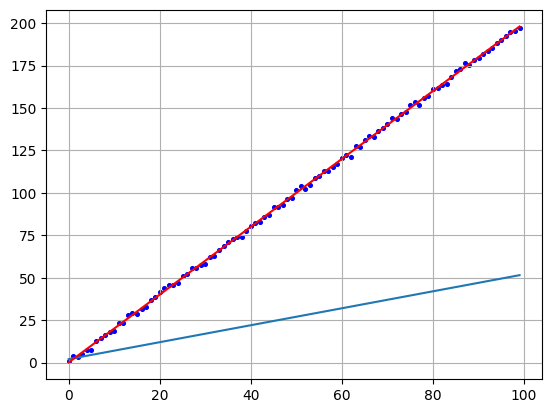

In [9]:
class Reg:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)

    @property
    def get(self):
        return self.x, self.y
    
    def Least_square(self):
        N = len(self.x)    # число экспериментов
        sigma = 3   # стандартное отклонение наблюдаемых значений
        k = 0.5     # теоретическое значение параметра k
        b = 2       # теоретическое значение параметра b

        x = np.array(range(N))
        f = np.array([k*z+b for z in range(N)])
        y = f + np.random.normal(0, sigma, N)

  
        mx = self.x.sum()/N
        my = self.y.sum()/N
        a2 = np.dot(self.x.T, self.x)/N
        a11 = np.dot(self.x.T, self.y)/N

        kk = (a11 - mx*my)/(a2 - mx**2)
        bb = my - kk*mx
        ff = np.array([kk*z+bb for z in range(N)])

        plt.scatter(self.x, self.y, s=7, c='blue')
        plt.plot(f)
        plt.plot(ff, c='red')
        plt.grid(True)

        
model = Reg(X, Y)
model.Least_square()

--------

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, ARDRegression, GammaRegressor, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

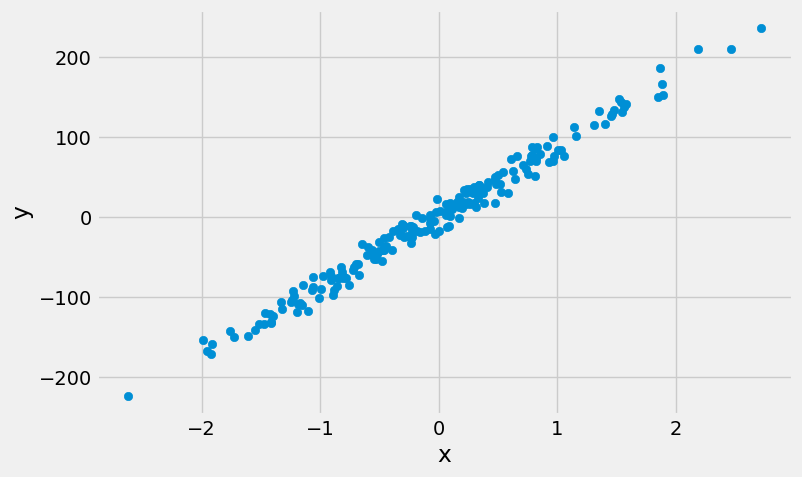

In [63]:
x, y = make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1, noise=10, random_state=42)

plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y)

In [64]:
model_l = LinearRegression()
model_l.fit(x, y)

LinearRegression()

In [65]:
y_pred = model_l.predict(x)

In [66]:
model_a = model_l.coef_[0]
model_b = model_l.intercept_

In [75]:
predict = model_a * x + model_b

In [73]:
y_pred = model_l.predict(x)

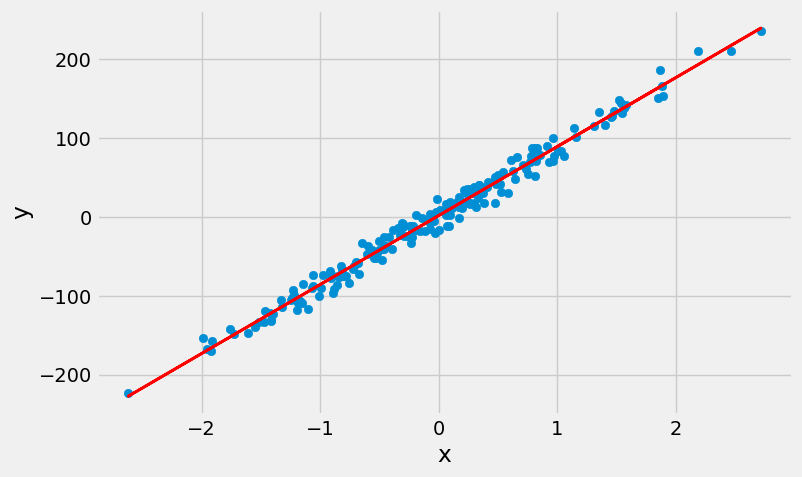

In [76]:
plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y)
plt.plot(x, predict, c='r', linewidth=2)

In [78]:
model_l.predict(x[:1])

array([163.25542748])

In [2]:
X, Y = make_regression(n_features=1, n_samples=20, n_targets=1, noise=10, random_state=42)


In [3]:
X = X.reshape(-1)
Y = Y.reshape(-1)

In [4]:
df = pd.DataFrame({'X':np.round(X, 1), 'Y': np.round(Y, 1)})

In [5]:
df.head()

,X,Y
0,0.6,55.1
1,0.5,16.4
2,-0.2,-15.8
3,-1.7,-81.0
4,-0.9,-13.6


In [6]:
x = df['X'].values.reshape(-1, 1)
y = df['Y'].values.reshape(-1, 1)

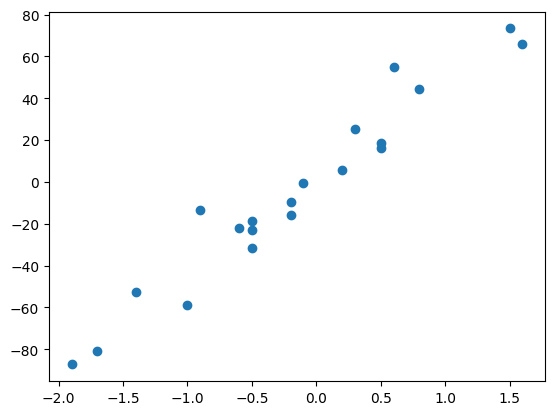

In [7]:
plt.scatter(x, y)

In [8]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [9]:
y_predict = model.predict(x)

In [10]:
coef = model.coef_ * x + model.intercept_

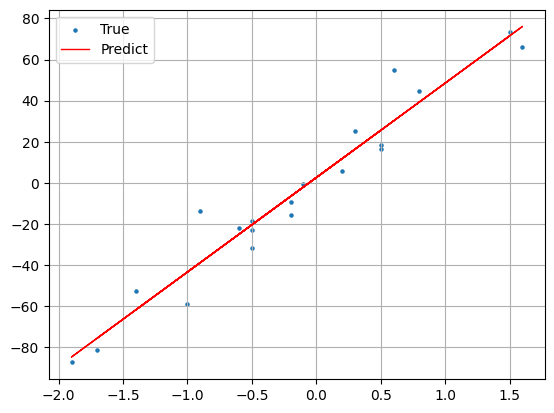

In [11]:
plt.scatter(x, y, s=5, label='True')
plt.grid(True)
plt.plot(x, coef, c='r', linewidth=1, label='Predict')
plt.legend()

--------------------------

In [65]:
start = 5

In [89]:
def func_(x):
    return x**2

def grad_(x):
    return 2 * x

In [72]:
D = 10
x = np.linspace(-D,  D, 20)
y = func(x)

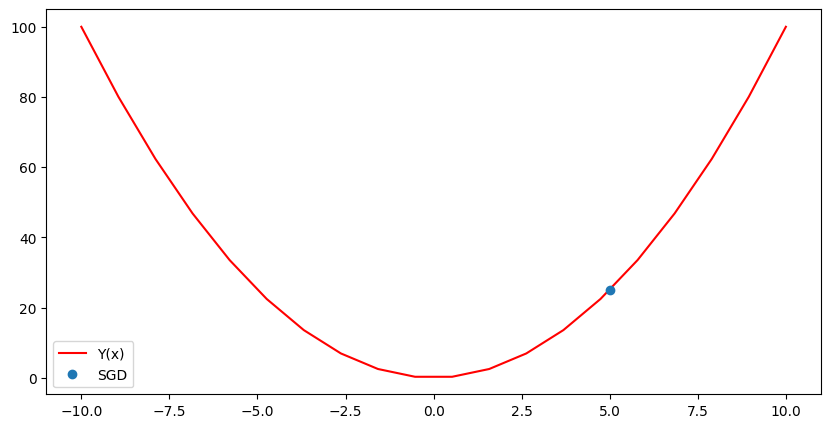

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, c='r', label='Y(x)')
plt.plot(start, func_(start), 'o', label='SGD')
plt.legend()

In [95]:
grad = grad_(start)
grad

10

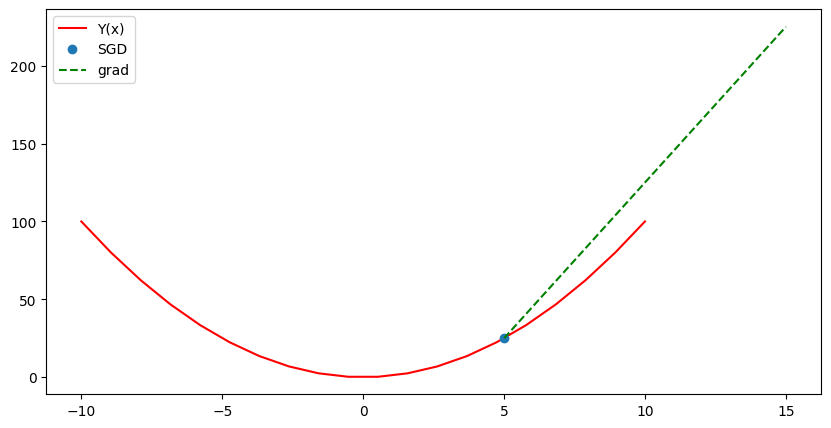

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, c='r', label='Y(x)')
plt.plot(start, func_(start), 'o', label='SGD')


next_point = start + grad

plt.plot([start, next_point],  func_(np.array([start, next_point])), '--g', label='grad')
plt.legend()

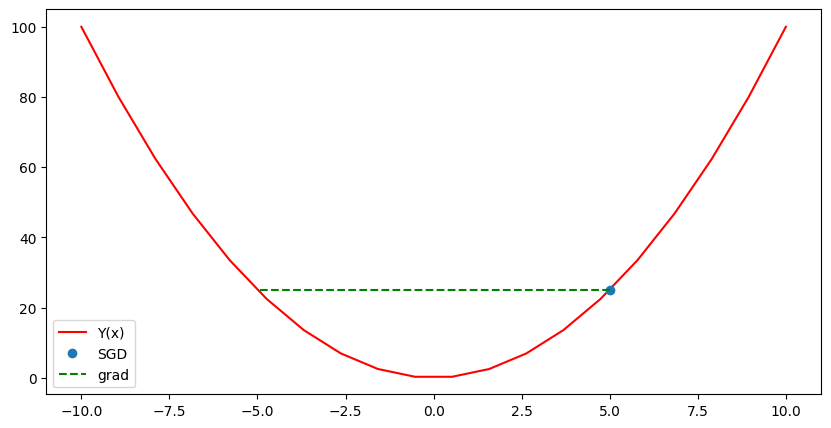

In [107]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, c='r', label='Y(x)')
plt.plot(start, func_(start), 'o', label='SGD')


next_point = start - grad

plt.plot([start, next_point],  func_(np.array([start, next_point])), '--g', label='grad')
plt.legend()

In [110]:
learning_rate = 0.1

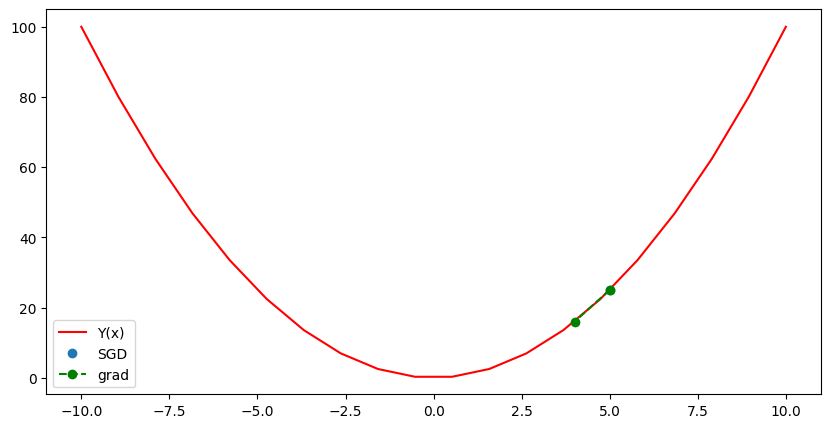

In [123]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, c='r', label='Y(x)')
plt.plot(start, func_(start), 'o', label='SGD')


next_point = start - learning_rate * grad

plt.plot([start, next_point],  func_(np.array([start, next_point])), '--o', label='grad', color='green')
plt.legend()

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import numpy as np

In [161]:
x, y, coef = make_regression(n_samples=100, n_features=1, n_informative=1, noise=20, coef=True)

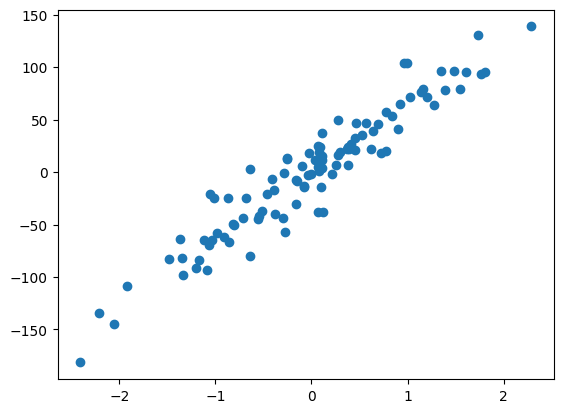

In [162]:
plt.scatter(x, y)

In [163]:
df = pd.DataFrame({'x': np.round(x.reshape(-1), 2), 'y': np.round(y.reshape(-1), 2)})

In [164]:
df.head()

,x,y
0,0.37,22.30
1,0.84,52.98
2,-2.41,-181.46
3,-0.81,-50.67
4,0.92,65.18


In [165]:
x = df.x.values.reshape(-1, 1)
y = df.y.values.reshape(-1, 1)

In [166]:
model_l = LinearRegression()
model_l.fit(x, y)

LinearRegression()

In [167]:
coef = model_l.coef_
intercept = model_l.intercept_

In [168]:
pedict = coef * x + intercept

In [169]:
rmse = mean_squared_error(y, y_pred)**0.5
r2 = r2_score(y, y_pred)

print(f'rmse: {rmse:.2f}', f'r2_score: {r2:.2f}', f'score: {model_l.score(x, y):.2f}', sep='\n')

rmse: 59.92
r2_score: 0.03
score: 0.91


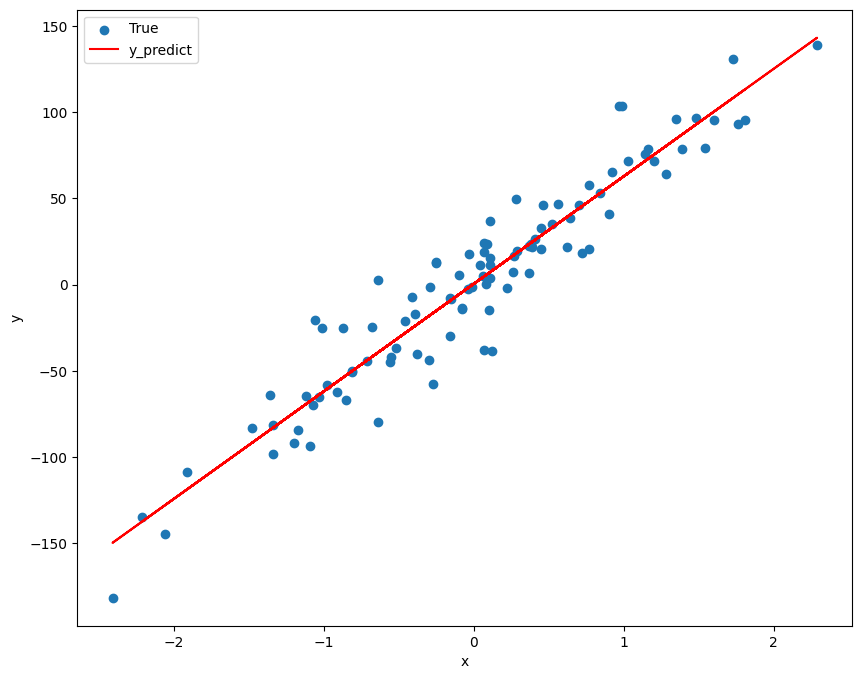

In [176]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='True')
plt.plot(x, pedict, c='r', label='y_predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

--------------------------

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [178]:
model_l1 = Lasso(alpha=0.1)
model_l1.fit(x_train, y_train)

Lasso(alpha=0.1)

In [179]:
y_pred_l1_test = model_l1.predict(x_test)
y_pred_l1_train = model_l1.predict(x_train)

In [180]:
rmse_l1_test = mean_squared_error(y_test, y_pred_l1_test)**0.5
rmse_l1_train = mean_squared_error(y_train, y_pred_l1_train)**0.5
r2_l_test = r2_score(y_test, y_pred_l1_test)
r2_l_train = r2_score(y_train, y_pred_l1_train)

print(f'rmse_test:   {rmse_l1_test:.2f}')
print(f'rmse_train:   {rmse_l1_train:.2f}')
print(f'r2_sore_test:   {r2_l_test:.2f}')
print(f'r2_score_train:   {r2_l_train:.2f}')

rmse_test:   16.45
rmse_train:   19.31
r2_sore_test:   0.91
r2_score_train:   0.90


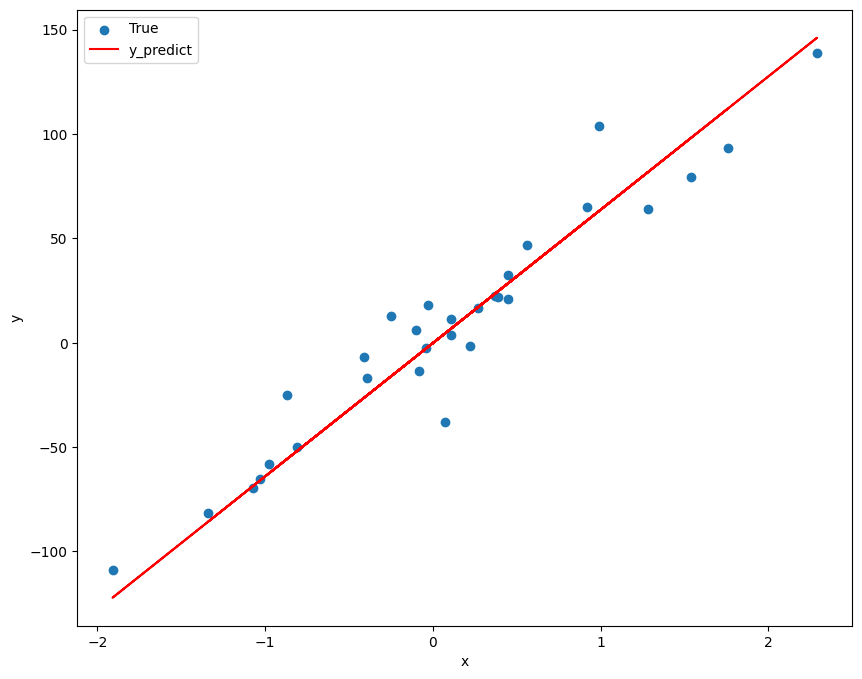

In [181]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test, y_test, label='True')
plt.plot(x_test, y_pred_l1_test, c='r', label='y_predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

----

In [154]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(x_train, y_train)


Ridge(alpha=0.5)

In [155]:
y_pred_r_test = model_ridge.predict(x_test)
y_pred_r_train = model_ridge.predict(x_train)

In [156]:
rmse_r_test = mean_squared_error(y_test, y_pred_r_test)**0.5
rmse_r_train = mean_squared_error(y_train, y_pred_r_train)**0.5
r2_r_test = r2_score(y_test, y_pred_r_test)
r2_r_train = r2_score(y_train, y_pred_r_train)

print(f'rmse_test:   {rmse_l1_test:.2f}')
print(f'rmse_train:   {rmse_l1_train:.2f}')
print(f'r2_sore_test:   {r2_l_test:.2f}')
print(f'r2_score_train:   {r2_l_train:.2f}')

rmse_test:   19.82
rmse_train:   19.09
r2_sore_test:   0.95
r2_score_train:   0.96


----------

In [157]:
model_elastic = ElasticNet(alpha=0.1)
model_elastic.fit(x_train, y_train)

ElasticNet(alpha=0.1)

In [158]:
y_pred_e_test = model_elastic.predict(x_test)
y_pred_e_train = model_elastic.predict(x_train)

In [159]:
rmse_r_test = mean_squared_error(y_test, y_pred_e_test)**0.5
rmse_r_train = mean_squared_error(y_train, y_pred_e_train)**0.5
r2_r_test = r2_score(y_test, y_pred_e_test)
r2_r_train = r2_score(y_train, y_pred_e_train)

print(f'rmse_test:   {rmse_l1_test:.2f}')
print(f'rmse_train:   {rmse_l1_train:.2f}')
print(f'r2_sore_test:   {r2_l_test:.2f}')
print(f'r2_score_train:   {r2_l_train:.2f}')

rmse_test:   19.82
rmse_train:   19.09
r2_sore_test:   0.95
r2_score_train:   0.96
